## Financial News and Stock Price Integration
 This notebook shows the relationship between financial news data and stock market returns through Natural Language Processing (NLP) techniques

Tasks: 
    1. Date Alignment: aligning the stock data with news data based on dates to correlate market movements with news sentiment.
    2. Sentiment Analysis: Conducting sentiment analysis on news headlines to quantify the tone of each article (positive, negative, neutral).
    
    Analysis:
        - Calculate Daily Stock Returns: Computing the percentage change in daily closing prices to represent stock  movements.
        Correlation Analysis: Using statistical methods to test the correlation between daily news sentiment scores and stock returns.

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.sentiment_correlation_analysis import *

In [4]:
# Load and stock and news data
data_directory = "../data/yfinance_data/"  
stock_data = merge_stocks(data_directory)

news_data=pd.read_csv('../data/raw_analyst_ratings.csv')

In [5]:
# Ensure date columns are in datetime format Calculate daily returns
#stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
#news_data['date'] = pd.to_datetime(news_data['date'], utc=True, format='mixed').dt.date

### Descriptive Statistics

In [6]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL


In [7]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
stock_data.shape

(45428, 10)

In [9]:
news_data.shape

(1407328, 6)

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          45428 non-null  datetime64[ns]
 1   Open          45428 non-null  float64       
 2   High          45428 non-null  float64       
 3   Low           45428 non-null  float64       
 4   Close         45428 non-null  float64       
 5   Adj Close     45428 non-null  float64       
 6   Volume        45428 non-null  int64         
 7   Dividends     45428 non-null  float64       
 8   Stock Splits  45428 non-null  float64       
 9   Stock         45428 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 3.8+ MB


In [11]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [12]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,45428,45428.000000,45428.000000,45428.000000,45428.000000,45428.000000,4.542800e+04,45428.000000,45428.000000
mean,2009-04-26 08:53:21.549704960,46.798370,47.397792,46.190101,46.810590,45.367891,2.177785e+08,0.000847,0.002499
min,1980-12-12 00:00:00,0.034896,0.035547,0.033333,0.034115,0.031291,0.000000e+00,0.000000,0.000000
25%,2002-02-25 18:00:00,0.690500,0.708000,0.673541,0.693604,0.585204,4.746455e+07,0.000000,0.000000
50%,2011-06-20 12:00:00,13.646101,13.827710,13.463250,13.644750,13.076301,9.921200e+07,0.000000,0.000000
75%,2018-02-15 00:00:00,47.242501,47.720626,46.628125,47.193626,44.768961,2.610595e+08,0.000000,0.000000
max,2024-07-30 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,9.230856e+09,3.080000,20.000000
std,NaN,78.259474,79.277620,77.218532,78.274673,78.049554,3.076645e+08,0.022527,0.155291


In [13]:
# start and end date for news data 
print(f"Start date of news_data: {news_data['date'].min()}")
print(f"End date of news_data: {news_data['date'].max()}")

# start and end date for stock data 
print(f"Start date of stock_data: {stock_data['Date'].min()}")
print(f"End date of stock_data: {stock_data['Date'].max()}")

Start date of news_data: 2009-02-14 00:00:00
End date of news_data: 2020-06-11 17:12:35-04:00
Start date of stock_data: 1980-12-12 00:00:00
End date of stock_data: 2024-07-30 00:00:00


### stock and news timeline 

In [14]:
# Ensure date columns are in datetime format Calculate daily returns
#stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
news_data['date'] = pd.to_datetime(news_data['date'], utc=True, format='mixed')

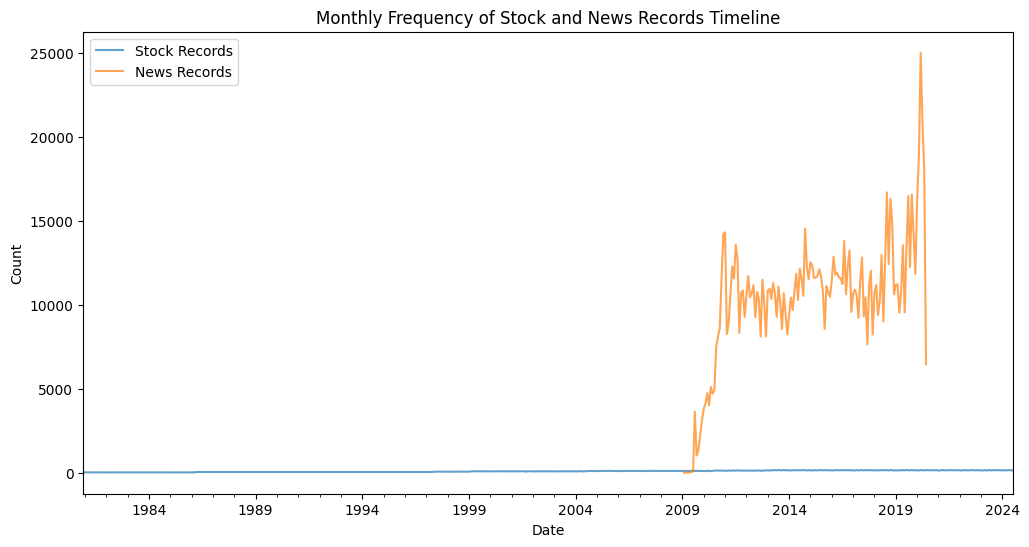

In [15]:
#  monthly frequency of the number of records 
stock = stock_data.resample('ME', on='Date').size()
news = news_data.resample('ME', on='date').size()

plt.figure(figsize=(12, 6))
stock.plot(label='Stock Records', alpha=0.7)
news.plot(label='News Records', alpha=0.7)
plt.title('Monthly Frequency of Stock and News Records Timeline')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [17]:
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Stock           0
dtype: int64

In [18]:
# Ensure date columns are in datetime format Calculate daily returns
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date
news_data['date'] = pd.to_datetime(news_data['date'], utc=True, format='mixed').dt.date

### perform sentiment analysis on the news data 

In [19]:
# Perform sentiment analysis on news data 
news_data = perform_sentiment_analysis(news_data)

In [20]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_Score
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.0


In [21]:
# change news 'date' column to 'Date'
news_data = news_data.rename(columns={'date': 'Date'})

In [22]:
# Aggregate sentiment scores if multiple articles appear on the same day
news_data = aggregate_daily_sentiment(news_data)

In [23]:
news_data.head()

,Date,Sentiment_Score
0,2009-02-14,0.000000
1,2009-04-27,0.000000
2,2009-04-29,0.000000
3,2009-05-22,0.000000
4,2009-05-27,0.234091


#### Calculate Stock Movements

In [24]:
#Compute daily percentage change in closing prices to represent stock movements
stock_data = calculate_daily_returns(stock_data)

In [25]:
stock_data[['Stock', 'Close','Daily_Return']].head()

,Stock,Close,Daily_Return
0,AAPL,0.128348,NaN
1,AAPL,0.121652,-0.052171
2,AAPL,0.112723,-0.073398
3,AAPL,0.115513,0.024751
4,AAPL,0.118862,0.028992


In [26]:
stock_data['Stock'].value_counts()

Stock
AAPL     10998
MSFT      9672
AMZN      6846
NVDA      6421
GOOGL     5020
TSLA      3545
META      2926
Name: count, dtype: int64

### Merging of the stock data and the news data

In [27]:
# Convert date columns to datetime format
news_data['Date'] = pd.to_datetime(news_data['Date'], format='mixed', utc=True).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Align the datasets by dates
df = pd.merge(news_data, stock_data, on='Date', how='inner')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18178 entries, 0 to 18177
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             18178 non-null  object 
 1   Sentiment_Score  18178 non-null  float64
 2   Open             18178 non-null  float64
 3   High             18178 non-null  float64
 4   Low              18178 non-null  float64
 5   Close            18178 non-null  float64
 6   Adj Close        18178 non-null  float64
 7   Volume           18178 non-null  int64  
 8   Dividends        18178 non-null  float64
 9   Stock Splits     18178 non-null  float64
 10  Stock            18178 non-null  object 
 11  Daily_Return     18176 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
df.head()

,Date,Sentiment_Score,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,Daily_Return
0,2009-04-27,0.0,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,AAPL,0.006699
1,2009-04-27,0.0,4.194000,4.249000,4.110500,4.156000,4.156000,194118000,0.0,0.0,AMZN,-0.015865
2,2009-04-27,0.0,9.572619,9.700889,9.533018,9.612719,9.601792,91967429,0.0,0.0,GOOGL,-0.009089
3,2009-04-27,0.0,20.549999,20.820000,20.280001,20.400000,15.139336,68219600,0.0,0.0,MSFT,-0.024390
4,2009-04-27,0.0,0.282000,0.290000,0.273750,0.275500,0.252696,787024000,0.0,0.0,NVDA,-0.035871


In [30]:
df.tail()

,Date,Sentiment_Score,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,Daily_Return
18173,2020-06-11,0.007162,72.124001,72.723747,70.099998,70.192001,70.112213,39826000,0.0,0.0,GOOGL,-0.042303
18174,2020-06-11,0.007162,229.940002,232.889999,223.550003,224.429993,223.969742,26708200,0.0,0.0,META,-0.051958
18175,2020-06-11,0.007162,193.130005,195.759995,186.070007,186.270004,179.507339,52854700,0.0,0.0,MSFT,-0.053698
18176,2020-06-11,0.007162,9.150000,9.261250,8.786000,8.796250,8.770122,583652000,0.0,0.0,NVDA,-0.060907
18177,2020-06-11,0.007162,66.013336,67.930664,64.800003,64.856003,64.856003,238747500,0.0,0.0,TSLA,-0.050934


In [31]:
df.shape

(18178, 12)

In [32]:
df.isnull().sum()

Date               0
Sentiment_Score    0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Dividends          0
Stock Splits       0
Stock              0
Daily_Return       2
dtype: int64

In [33]:
np.isinf(df['Sentiment_Score']).sum()
np.isinf(df['Daily_Return']).sum()

np.int64(0)

In [34]:
df = df.dropna(subset=['Daily_Return'])

#### Calculate  pearson correlation between sentiment scores and stock returns

In [35]:
correlation_results = calculate_correlation(df)

In [36]:
print("Correlation between sentiment scores and stock returns:")
print(correlation_results)

Correlation between sentiment scores and stock returns:
Stock
AAPL     0.045453
AMZN     0.005832
GOOGL    0.017346
META     0.087696
MSFT     0.032802
NVDA    -0.026393
TSLA     0.049787
dtype: float64


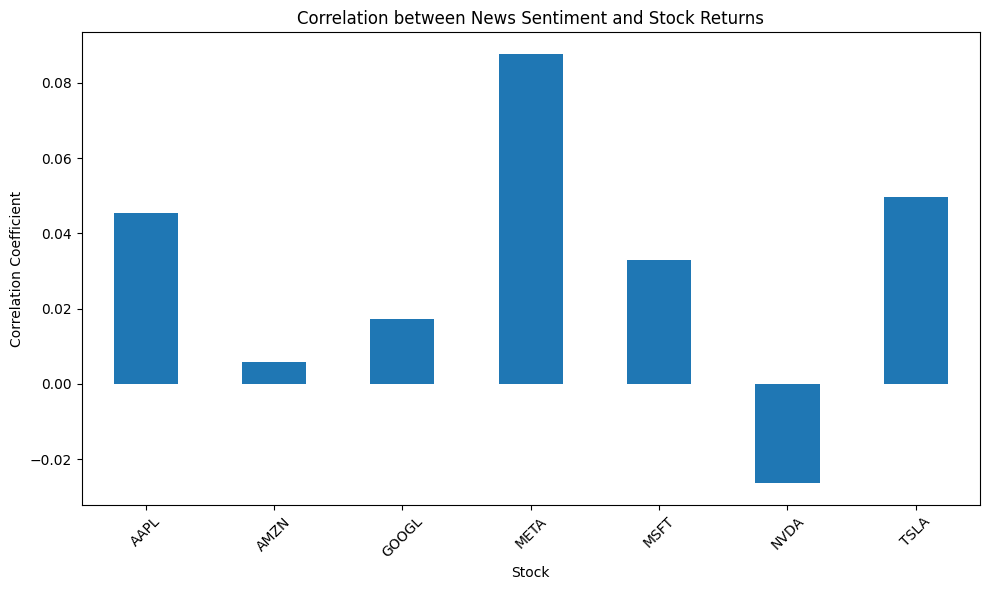

In [37]:
# Visualize correlation
plt.figure(figsize=(10, 6))
correlation_results.plot(kind='bar')
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Stock')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

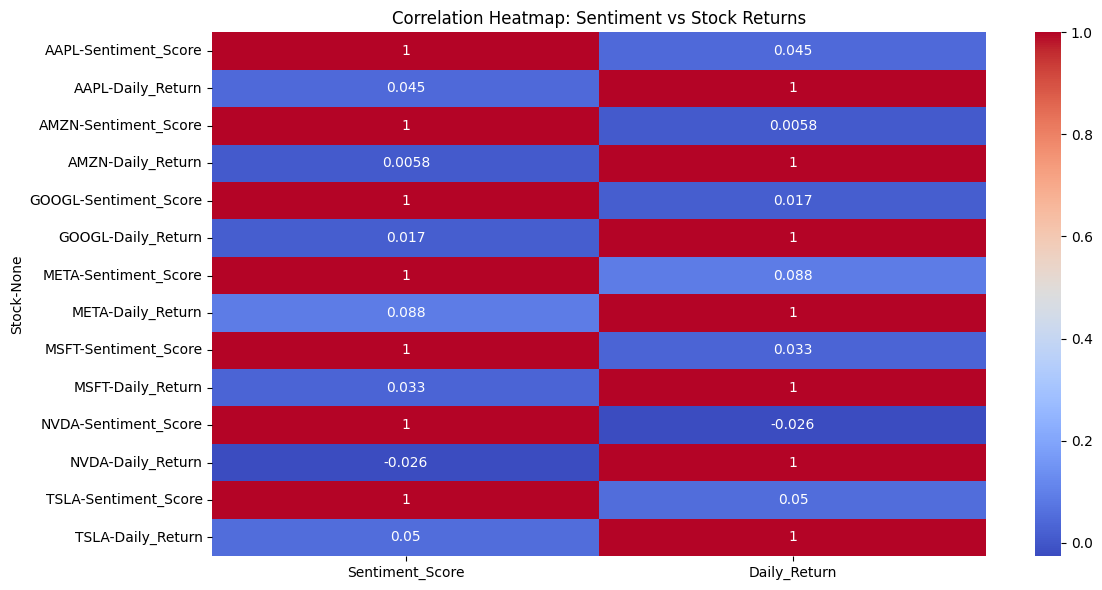

In [38]:
# Visualize correlation
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.groupby('Stock')[['Sentiment_Score', 'Daily_Return']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Sentiment vs Stock Returns')
plt.tight_layout()
plt.show()

Interpreting Correlation Strength 

In [39]:
# Function to interpret correlation strength
def interpret_correlation(corr):
    if abs(corr) < 0.2:
        return "Very weak"
    elif abs(corr) < 0.4:
        return "Weak"
    elif abs(corr) < 0.6:
        return "Moderate"
    elif abs(corr) < 0.8:
        return "Strong"
    else:
        return "Very strong"

# Analyze correlation strength
for stock in correlation_results.index:
    corr = correlation_results[stock]
    strength = interpret_correlation(corr)
    p_value = stats.pearsonr(df[df['Stock'] == stock]['Sentiment_Score'], 
                             df[df['Stock'] == stock]['Daily_Return'])[1]
    print(f"{stock}: Correlation = {corr:.4f} ({strength}), p-value = {p_value:.4f}")

AAPL: Correlation = 0.0455 (Very weak), p-value = 0.0170
AMZN: Correlation = 0.0058 (Very weak), p-value = 0.7595
GOOGL: Correlation = 0.0173 (Very weak), p-value = 0.3626
META: Correlation = 0.0877 (Very weak), p-value = 0.0001
MSFT: Correlation = 0.0328 (Very weak), p-value = 0.0851
NVDA: Correlation = -0.0264 (Very weak), p-value = 0.1659
TSLA: Correlation = 0.0498 (Very weak), p-value = 0.0127


### sentiment and daily returns over time for each stock

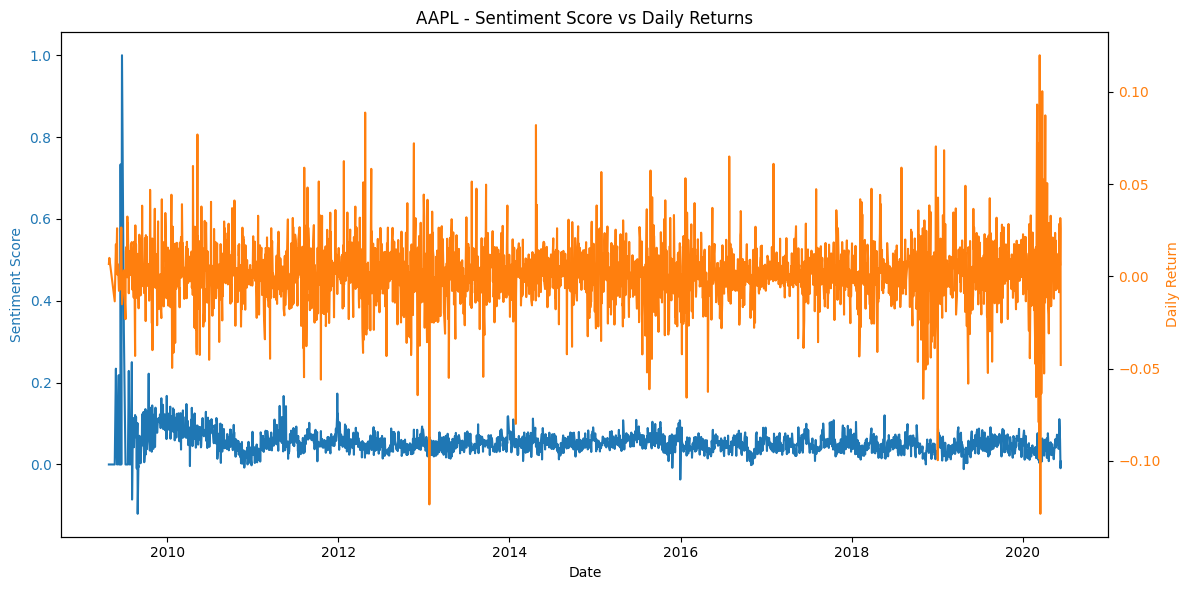

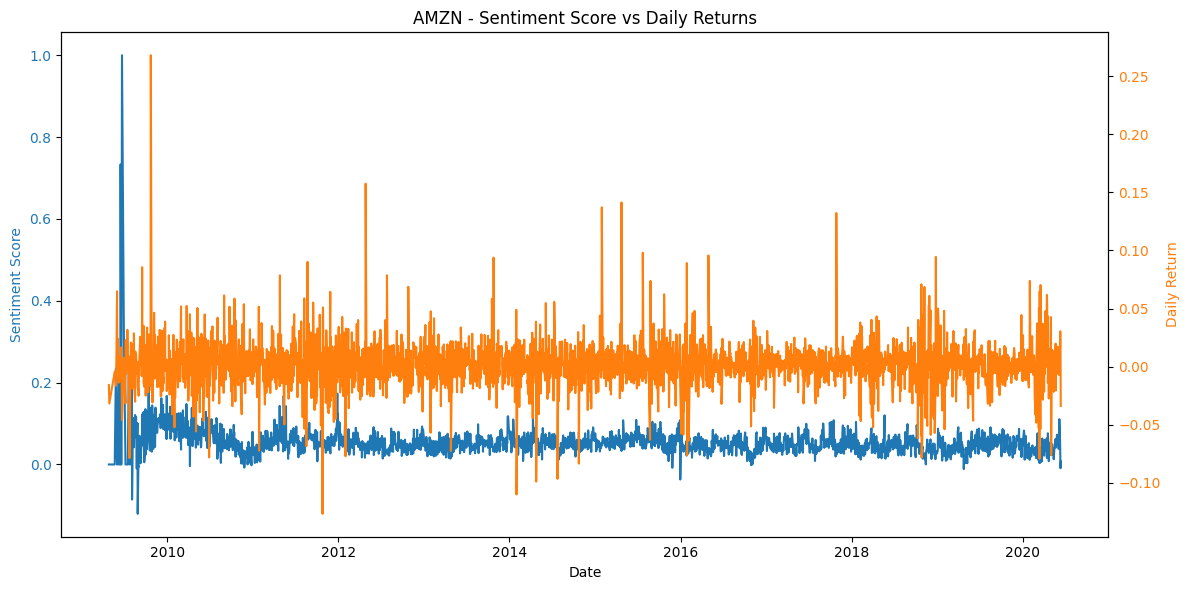

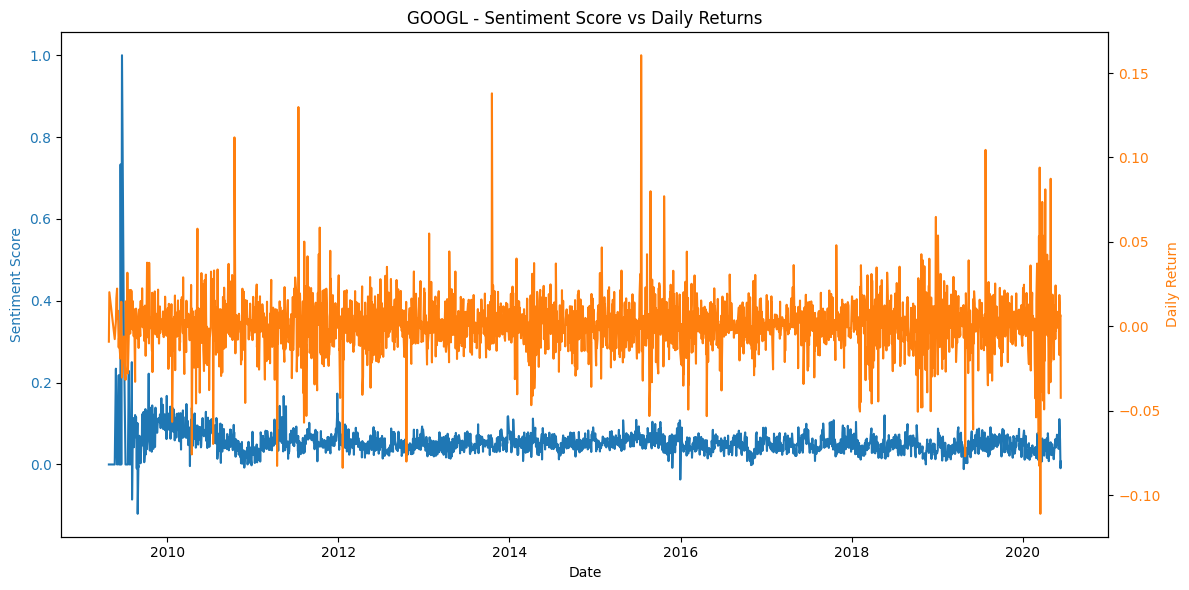

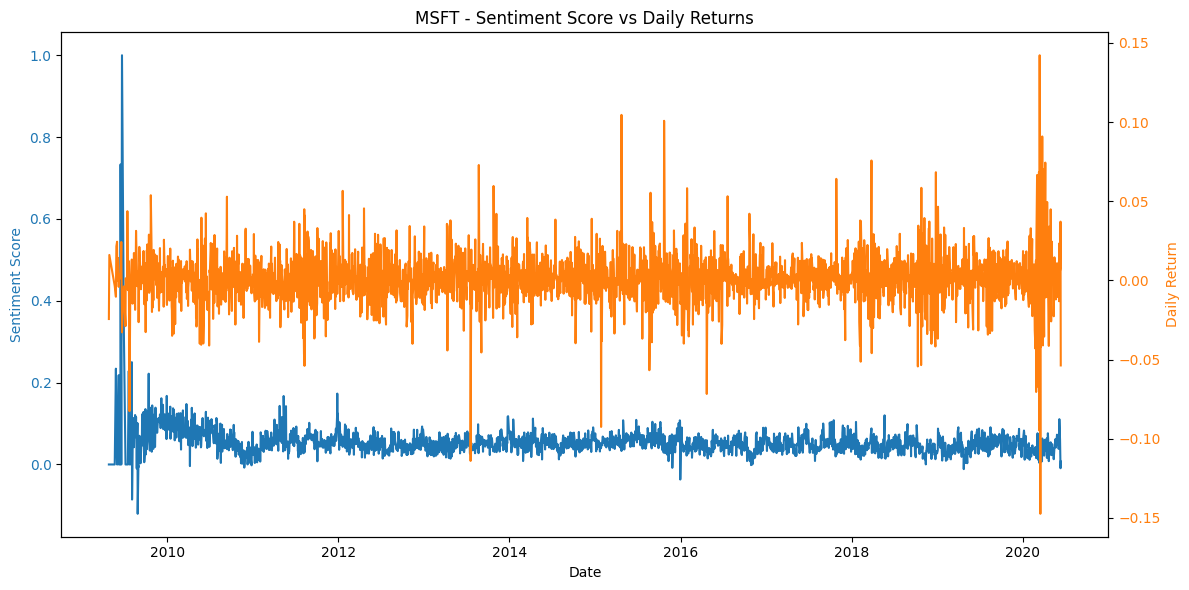

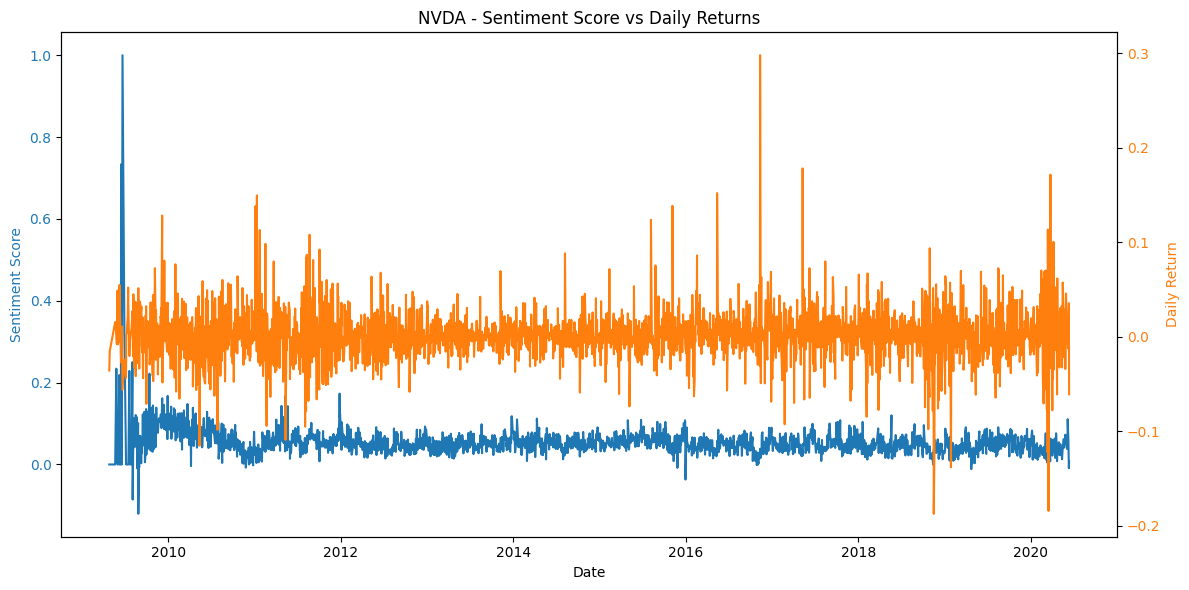

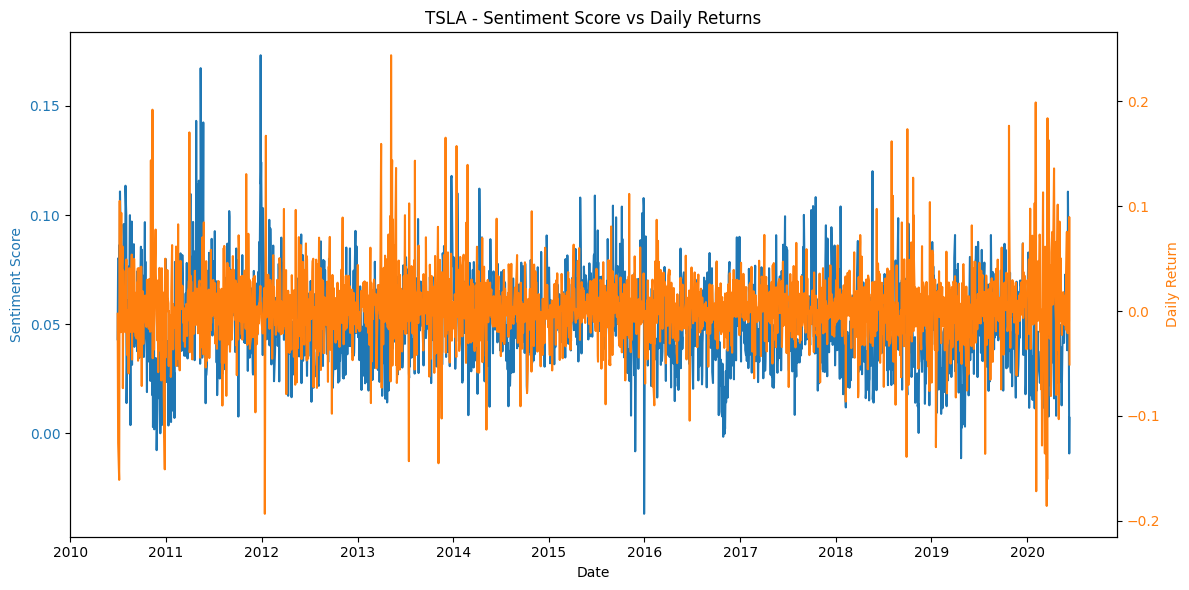

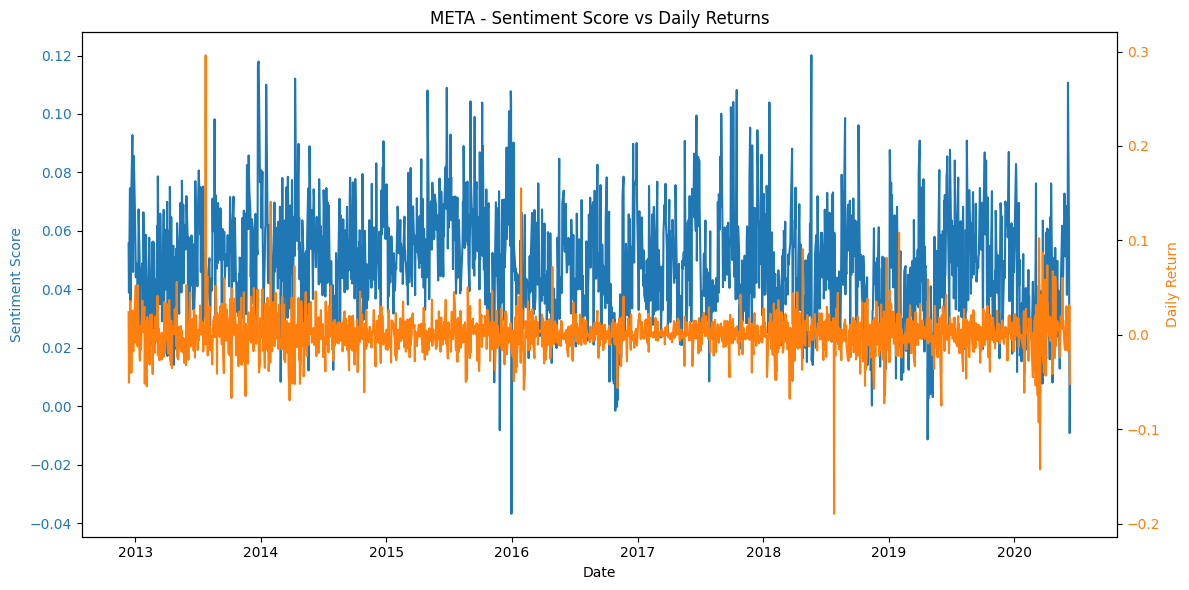

In [40]:
# Plot sentiment and returns over time for each stock
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock].sort_values('Date')
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Sentiment Score', color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Sentiment_Score'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Daily Return', color='tab:orange')
    ax2.plot(stock_data['Date'], stock_data['Daily_Return'], color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    
    plt.title(f'{stock} - Sentiment Score vs Daily Returns')
    fig.tight_layout()
    plt.show()

#### Additional analysis: Moving average of sentiment and returns

In [41]:
df['MA_Sentiment'] = df.groupby('Stock')['Sentiment_Score'].rolling(window=5).mean().reset_index(0, drop=True)
df['MA_Return'] = df.groupby('Stock')['Daily_Return'].rolling(window=5).mean().reset_index(0, drop=True)

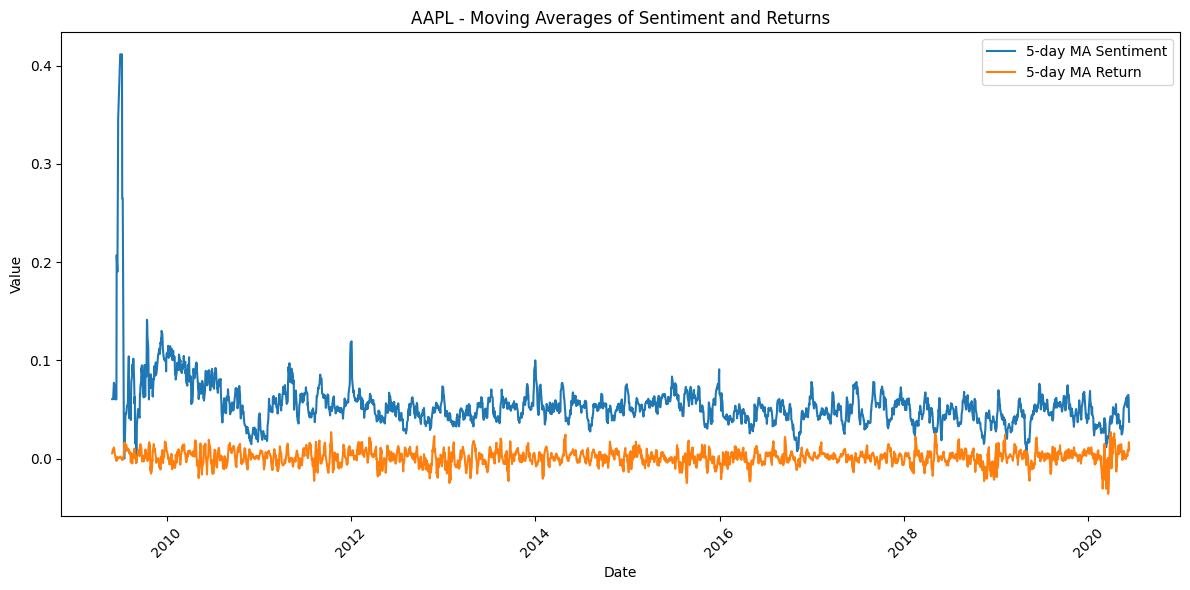

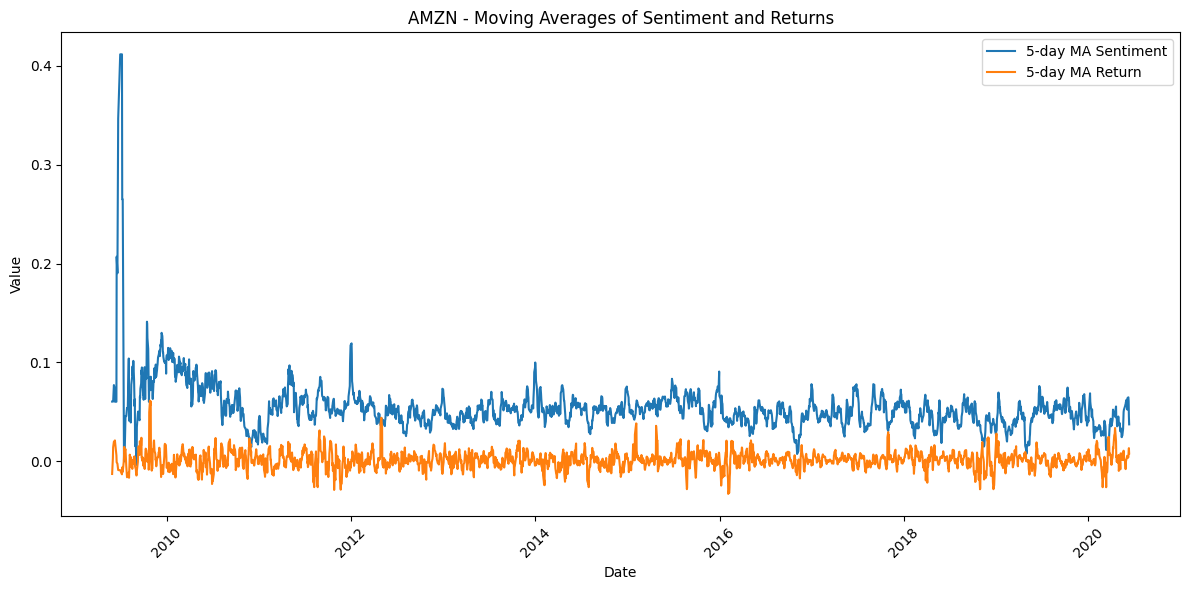

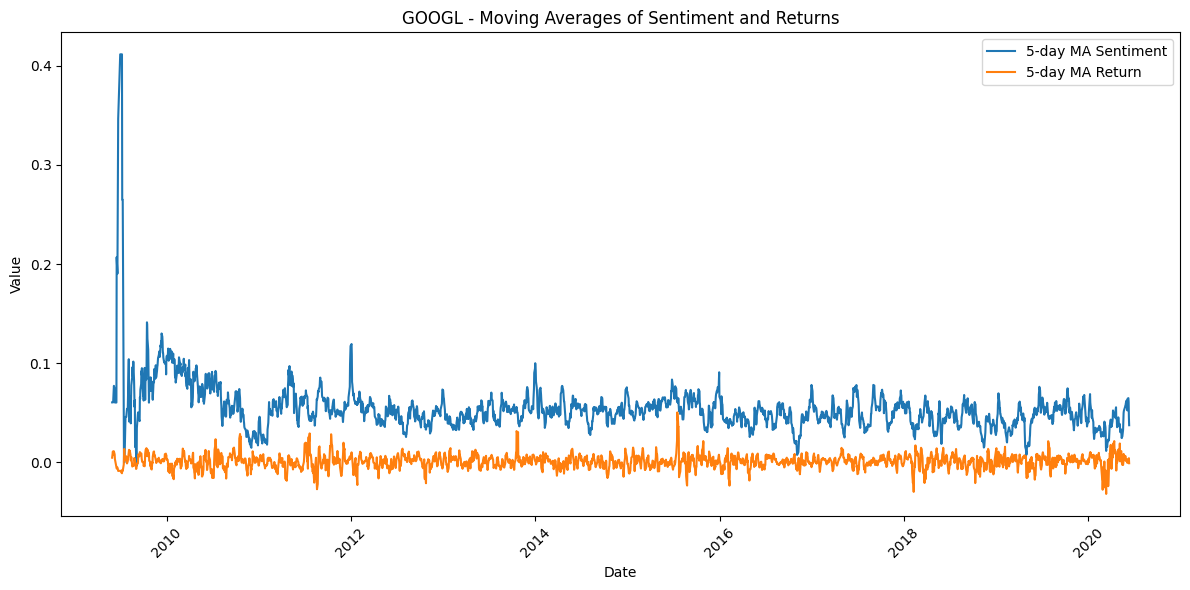

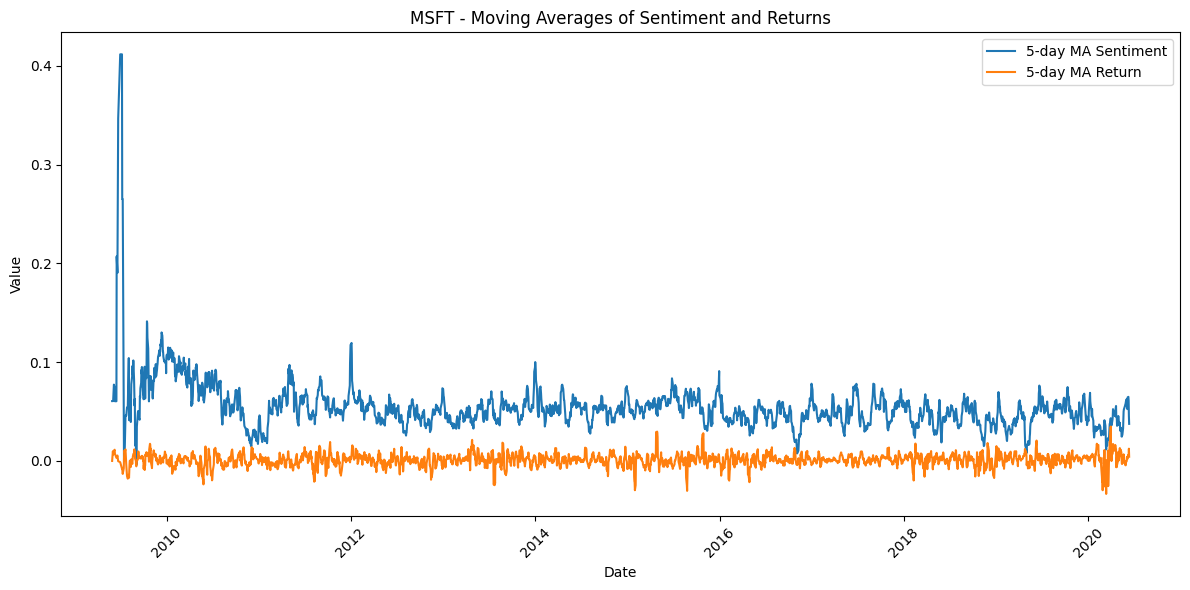

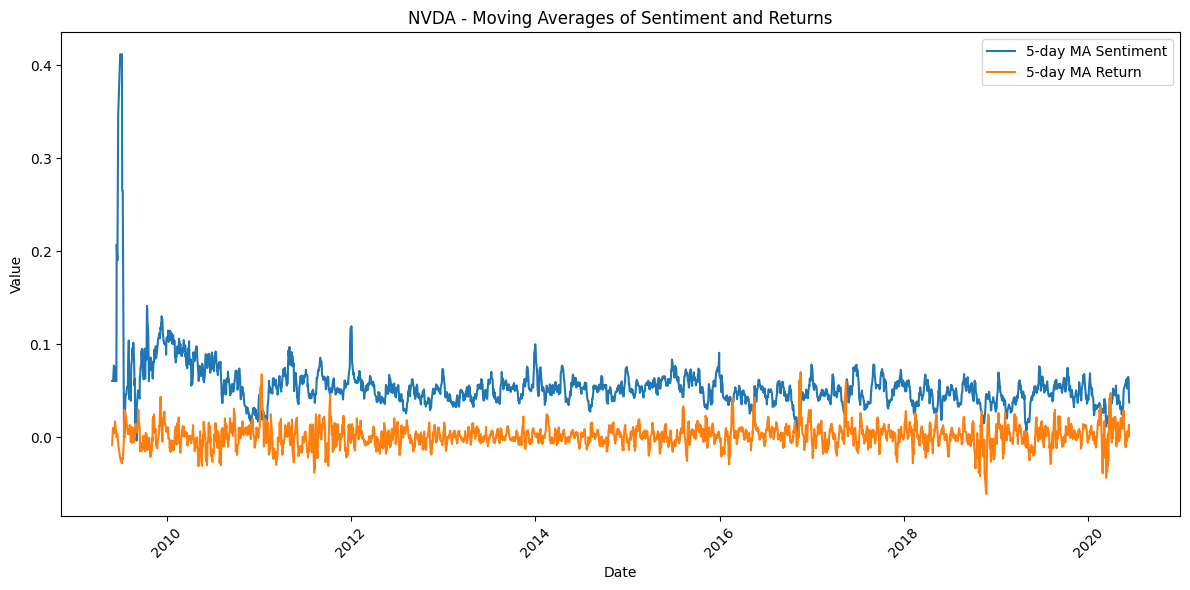

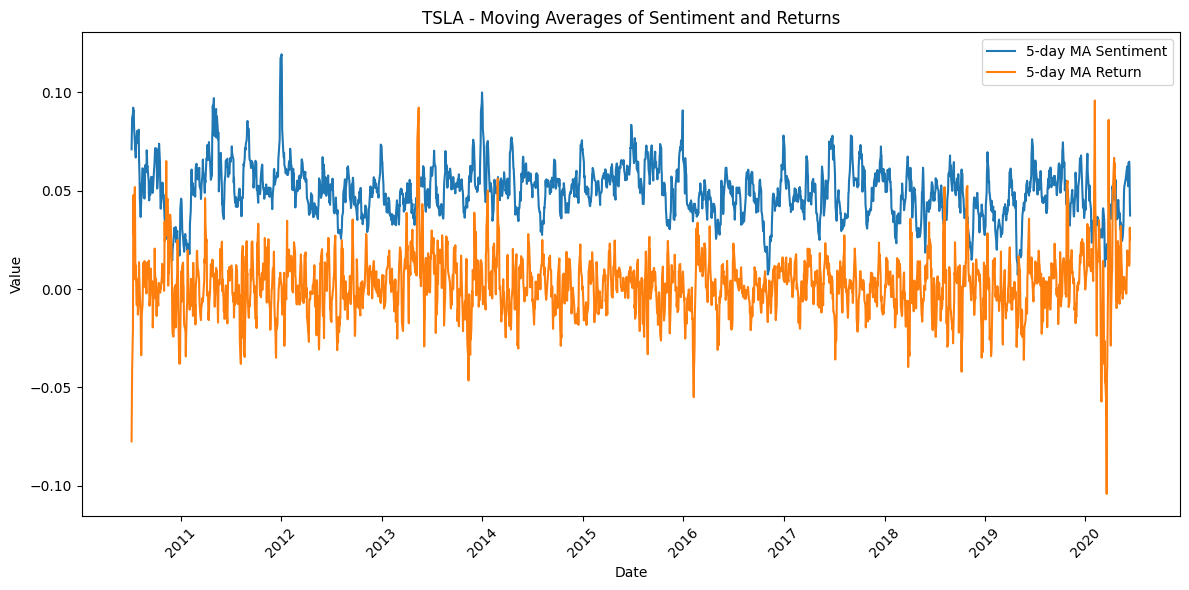

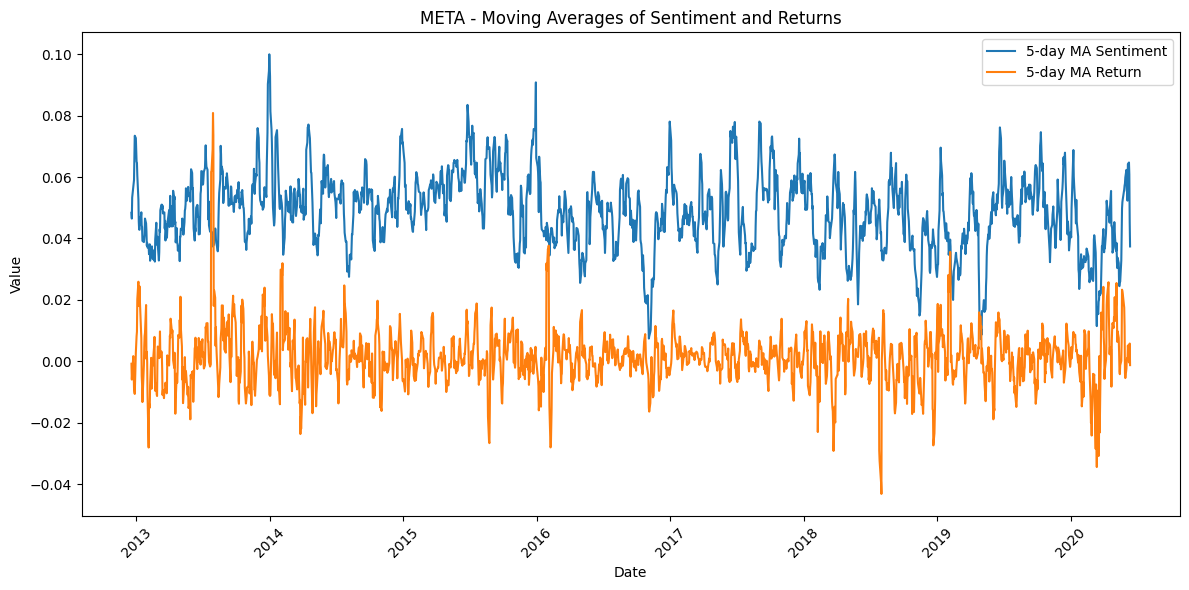

In [43]:
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock].sort_values('Date')

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['MA_Sentiment'], label='5-day MA Sentiment')
    plt.plot(stock_data['Date'], stock_data['MA_Return'], label='5-day MA Return')
    plt.title(f'{stock} - Moving Averages of Sentiment and Returns')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### sentiment trends over time 

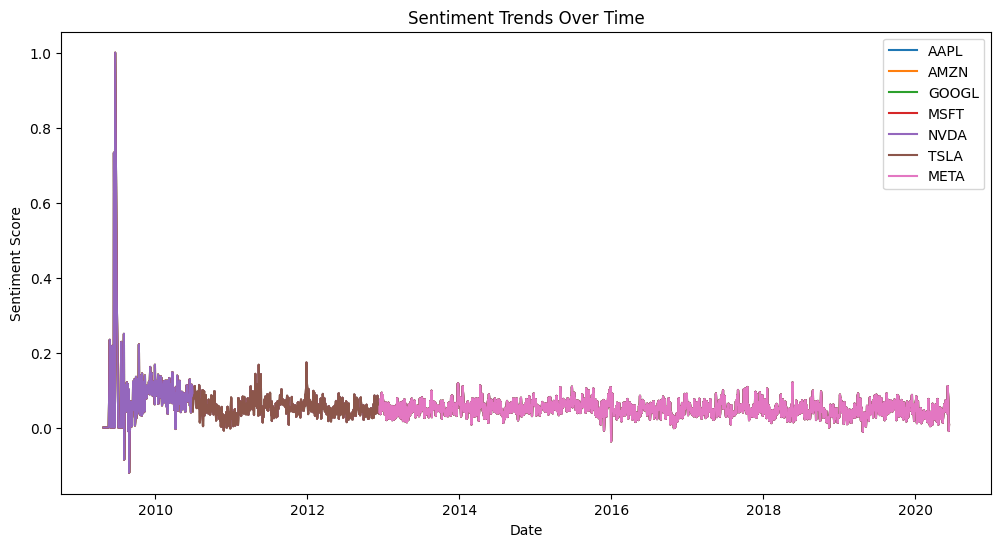

In [44]:
plt.figure(figsize=(12, 6))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.plot(stock_data['Date'], stock_data['Sentiment_Score'], label=stock)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

#### sentiment category 

In [45]:
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

def add_sentiment_category(df):
    df['Sentiment_Category'] = df['Sentiment_Score'].apply(categorize_sentiment)
    return df

In [46]:
df = add_sentiment_category(df)

#### Daily returns vs sentiment category(positive, negative, neutral )

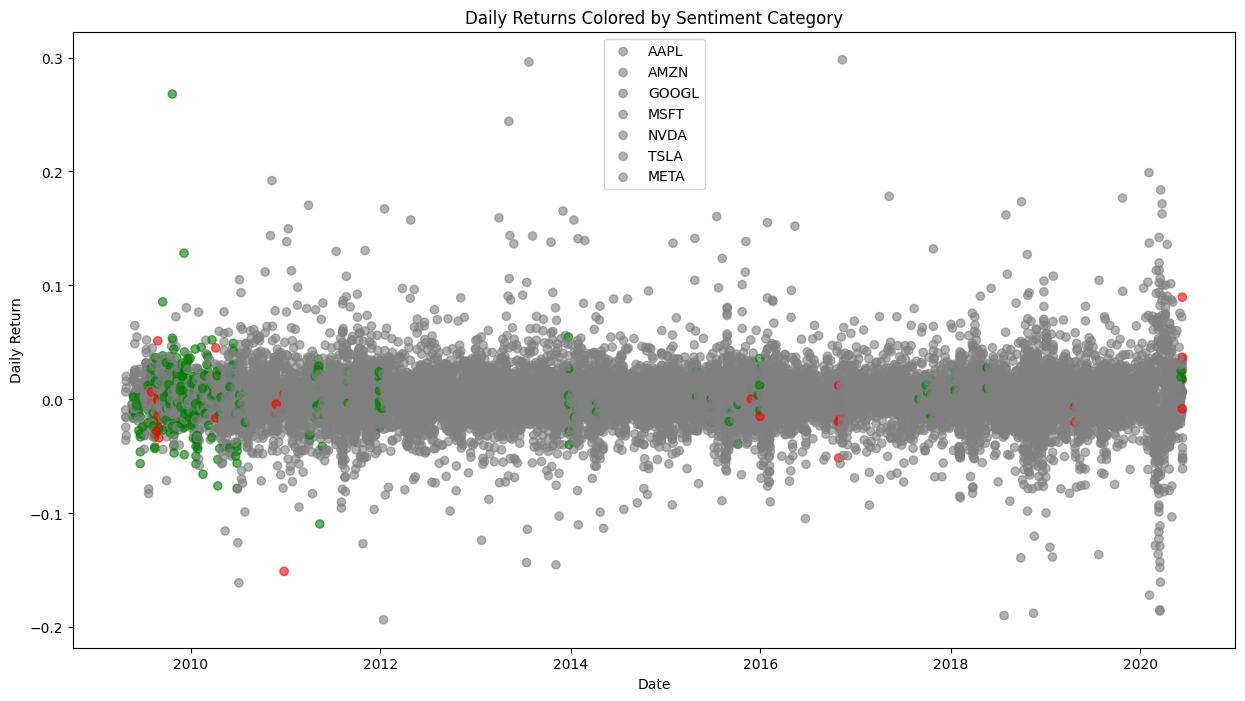

In [47]:
plt.figure(figsize=(15, 8))
for stock in df['Stock'].unique():
    stock_data = df[df['Stock'] == stock]
    plt.scatter(stock_data['Date'], stock_data['Daily_Return'], 
                c=stock_data['Sentiment_Category'].map({'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}),
                label=stock, alpha=0.6)
plt.title('Daily Returns Colored by Sentiment Category')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()